In [ ]:
# 구글 드라이브의 폴더와 구글 코랩 폴더 연결
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 현재 경로 확인
!pwd

/content


In [ ]:
# drive/My Drive/Colab Notebooks 경로로 변경
%cd drive/My\ Drive/Colab\ Notebooks\

/content/drive/My Drive/Colab Notebooks


# Machine Learning 

## 데이터 수집부터 머신러닝까지 순서 

```python
Pipeline 

1. Data 수집하기 
- Own datasets (csv, pickle등 본인이 수집한 데이터 혹은 기업 데이터/개인이거나 단체가 직접 수집한 데이터) 
- Public datasets (공공데이터 API, mnist, kaggle data 등)    
- Crawling & Scraping (거의 대부분이 불법이니 조심해야 한다)
- 기타 
2. 도메인 지식 확보하기 (필요할 시) 
- 데이터에 포함된 Documentation을 읽는다 
- 이미 알고 있는 전문 분야일 경우 생략 
- 구글링
- 책 
- 기타 
3. Data 불러오기 
- Pandas DataFrame으로 불러오기 
- Numpy로 불러오기 
- 기타 
4. 대략적인 Data 파악하기 
- Info로 데이터 정보 확인하기 
- dtype확인 하기 
- shape확인 하기 
- missing data확인 하기 
- 마지막 Tidy data인지 확인 하기 
5. Data 조작하기 (Tidy data가 아닐 경우) 
- Wide Format인 경우 Long Format으로 바꾸기 
- missing data 처리하기 
- 부적절한 data값 수정하기
- 기타 
6. Data 분석하기(EDA) 
- 그래프 그려보기 (histogram, pairplot, bar, pie등) 
- 데이터의 숨겨진 의미 파악하기 
- 데이터 양이 충분한지 파악하기 => learning_curve를 통해 확인한다 (중심 극한 정리)
- Feature 갯수가 데이터의 양에 비해 많은지 확인하기 (오캄의 면도날) 
- 기타 
7. Data 전처리 
- Hold out (2 way/3 way)
- Feature Selection
- Feature Scaling 
- Dimensionality Reduction
- 기타
8. 모델링 하기 
- Model selection 
- 알고리즘 비교하기
- 하이퍼 파라미터 찾기(GridSearchCV)
- 기타  
9. 성능 테스트
- 데이터 양이 적을 경우 Cross validation
- 정확도 파악하기 
- 기타 
```

## Data 형태

```
머신 러닝의 기본 데이터 형은 정형 데이터이다
정형 데이터는 2차원 형태의 데이터이다 
row(행)가 한 개이고 vector형태의 구조여야 한다
column(열)은 feature또는 dimension이라고 부른다 

최종적으로 Tidy data 형태로 만들어줘야 한다 
```

## EDA(Exploratory Data Analysis)

```
데이터를 다양한 각도에서 관찰하고 이해하는 과정이다
데이터를 분석하기 전에 그래프나 통계적인 방법으로 자료를 직관적으로 확인하는 과정이라고도 할 수 있다 
```

### Data shift

```
학습데이터셋과 테스트셋의 분포가 다른 경우
```

### Imbalanced data

```
클래스가 불균등한 데이터 
ex) True가 100만개 False가 100개 
```

## 기초 통계 분석(EDA)시 알아두면 좋은 원칙

```python
1. Law of large numbers(큰 수의 법칙)
- 큰 모집단에서 무작위로 뽑은 표본의 평균이 전체 모집단의 평균과 가까울 가능성이 높다 
- 모집단이 커지면 표본평균은 모평균을 더 정확히 추정할 수 있다
2. Occam's Razor (오캄의 면도날)
- 같은 성능을 보일 때 간단한것을 택한다
3. Curse of dimensionality (차원의 저주)
- 차원이 커지면 커질수록 필요한 데이터의 양이 커져야 한다
4. Central limit theorem (중심 극한 정리)
- 동일한 확률분포를 가진 독립 확률 변수 n개의 평균의 분포는 n이 적당히 크다면 정규분포에 가까워진다는 정리
```

In [3]:
from sklearn.model_selection import learning_curve # 데이터의 많고 적음은 learning_curve를 보고 확인한다 
import numpy as np
import tensorflow as tf 

In [14]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

In [7]:
X_test.shape

(10000, 28, 28)

In [8]:
y_test.shape

(10000,)

## Train-Test Ratio

```
Holdout 비율 잡는 방법 => 경험 
보통은 75%/25% 비율로 한다 
```

In [2]:
import matplotlib.pyplot as plt

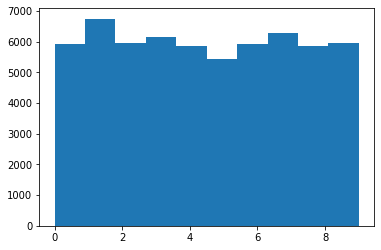

In [10]:
plt.hist(y_train); # 균형 잡힌 train 데이터 

In [11]:
np.unique(y_train, return_counts=True) # 클래스 종류 10가지 

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]))

In [13]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn_evaluation import plot

ImportError: ignored

In [ ]:
!pip install -U sklearn-evaluation

In [5]:
data = load_iris()

In [6]:
train_size, train_score, test_score = learning_curve(KNeighborsClassifier(), data.data, data.target)

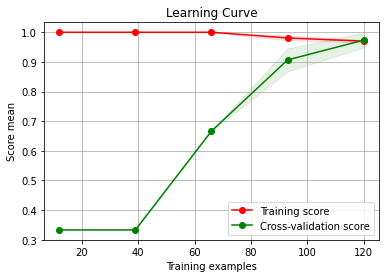

In [8]:
plot.learning_curve(train_score, test_score, train_size);

## Holdout

```python
Train data, test data를 분리시키는 방법

1. 2-way => train-test 
2. 3-way => train-validation-test
```

In [5]:
from sklearn.model_selection import train_test_split # 2-way / 3-way는 train_test_split을 두 번 하면 된다

## Modeling

```
모델이란 수많은 데이터를 통해 패턴을 발견하거나 예측을 수행하는 알고리즘의 표현식이다 
따라서 모델링은 그러한 알고리즘을 만들어 내는 과정을 말한다 

모델을 잘 만들기 위해서 모델링하기 전 데이터에 대한 이해가 필요하다 => EDA를 한다 
```

### 모델링 하기 전에 알아둬야 할 키워드

```
1. Ad-hoc : 특별한 목적을 가진 것
- 데이터에 따라서 달라진다 
- 일반적이지 않다 
2. No free lunch      <---->    Master algorithm 
- 공짜 점심은 없다 
```

In [6]:
from sklearn.model_selection import cross_val_score # 데이터 양이 적을때 사용하는 방법 

In [15]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)) # (28,28)인 2차원으로 만들어 준다 
])

In [16]:
X_train[0].shape # 2차원 데이터 

(28, 28)

In [17]:
X_train.dtype

dtype('uint8')

In [18]:
data = model(X_train) # 묵시적으로 데이터 타입이 uint8에서 float32로 바뀌었다 / 미분해야 하기 때문에 float타입이어야 한다 

In [ ]:
model.fit() # class_weight => 클래스에 가중치를 줌으로써 불균등한 데이터의 문제를 해결할 수 있다 

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier
from sklearn.svm import SVC

In [33]:
Ir = LogisticRegression() # 가정이 성립되면 전통적인 머신러닝 알고리즘 사용 가능하다 

In [35]:
Ir.fit(data.numpy(), y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [36]:
Ir.predict(X_test[0].reshape(1,-1))

array([7], dtype=uint8)

In [38]:
y_test[0]

7

In [20]:
svm = SVC()

In [23]:
svm.fit(data.numpy(), y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

```
본 수업 용어 규칙
전통적인 머신러닝 모델 = end to end (feature extraction + model)이 아닌 모델

여기서 end to end 모델은 input이 들어가서 output이 나오는 과정을 오로지 데이터에 의존해서 찾아내는 모델을 말한다 

end to end 모델이 성능이 좋을때가 많지만 충분한 학습 데이터가 없다면 굉장히 성능이 떨어지는 모델이 될 수 있다 
그리고 end to end 모델은 중간 과정을 설명할 수 없기 때문에 중간 과정을 설명해야 하는 중요한 문제가 발생하는 부분에서는 사용하기가 쉽지 않다 
```

## i.i.d (independent identically distributed)

```
독립 항등 분포

column을 바꿔도 의미가 유지가 되어야 한다
```

In [23]:
import seaborn as sns

In [24]:
iris = sns.load_dataset('iris')

In [25]:
iris # 컬럼(feature)간의 데이터는 서로 영향을 주면 안된다. 단 시계열 데이터 제외 

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


```
이미지는 column이 바뀌면 의미가 유지되지 않는다 
그래서 전통적인 방식의 머신러닝으로 이미지 데이터 사용하기 쉽지 않다 

단, 가설(가정)을 통해서 가능하게 할 수 있다 
```

## Assumption

```
이미지 데이터를 사용하여 전통적인 머신러닝 방식 해결하려면 가정이 필요하다 
가정이 잘못 되면 모든 것이 잘 못 될 경우가 있다 
이미지 데이터를 사용할 경우 data leakage문제가 발생하지 않는다 라는 가정을 갖고 학습을 하게 되면 전통적인 머신러닝 방식으로도 사용할 수 있다 
가정을 많이 할 수록 사용할 수 있는 것이 한정적이게 된다 

data leakage 문제: 학습 데이터 밖에서 유입된 데이터가 모델을 만드는데 사용되어 overfitting이 되거나 underfitting이 되는 경우를 말한다 
```

데이터를 2차원에서 1차원으로 변형할때 context를 유지해야 한다 

In [27]:
!pip install mglearn

     |████████████████████████████████| 540 kB 38.7 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582637 sha256=99743f34e91a385d156e999563cb6ae993136418e47ada843960ae22d47c7ab1
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


In [28]:
import mglearn

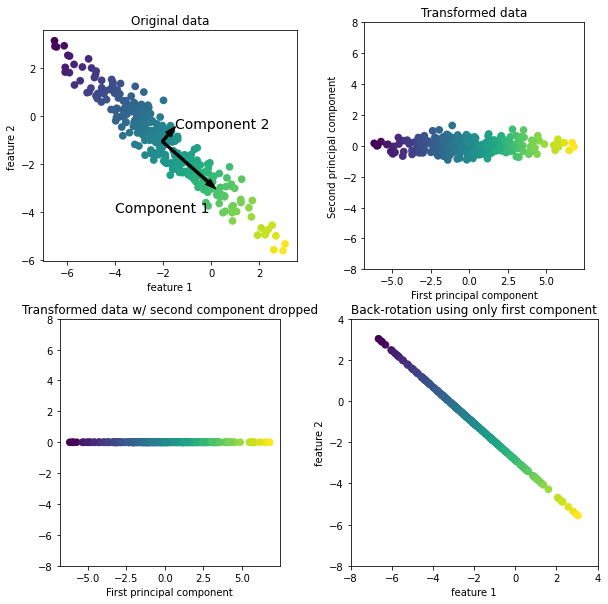

In [29]:
mglearn.plot_pca.plot_pca_illustration() # 1차원으로 바꿔도 context가 유지되는 경우 

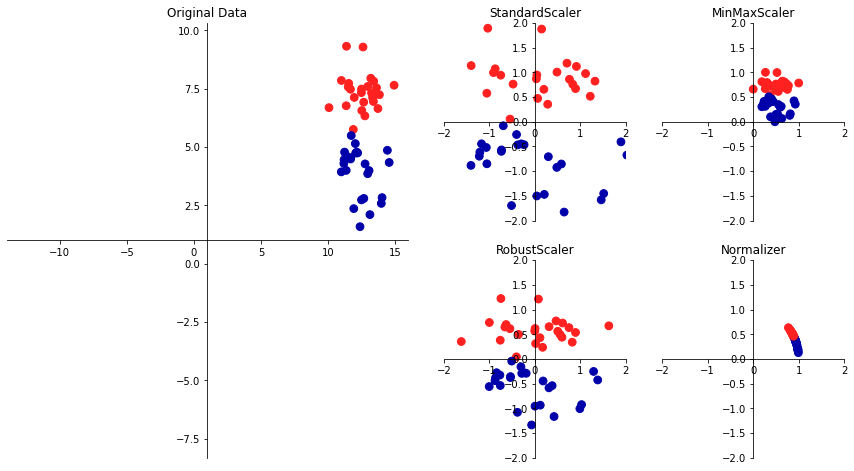

In [30]:
mglearn.plot_scaling.plot_scaling() # 정규화, 표준화 등 scaling을 해도 context가 유지된 경우 

## Model Selection

```python
1. Algorithm(알고리즘) 선택 
2. Hyper parameter(하이퍼 파라미터) 선택 
3. Ensemble(앙상블)
4. Train + Test data 합쳐서 재학습 => 최종 모델 
```

```
모델별로 inductive bias가 있다 
inductive bias란 학습 시에는 만나보지 않았던 상황에 대하여 정확한 예측을 하기 위해 사용하는 추가적인 가정 (additional assumptions)을 의미한다 
이러한 inductive bias를 추가하여 학습한 모델을 일반화 하는 것이 모델 학습의 최종 목표이다  
```

### opencv에도 알고리즘이 있다 

In [24]:
import cv2

In [25]:
dir(cv2.ml) # 머신러닝 알고리즘

['ANN_MLP_ANNEAL',
 'ANN_MLP_BACKPROP',
 'ANN_MLP_GAUSSIAN',
 'ANN_MLP_IDENTITY',
 'ANN_MLP_LEAKYRELU',
 'ANN_MLP_NO_INPUT_SCALE',
 'ANN_MLP_NO_OUTPUT_SCALE',
 'ANN_MLP_RELU',
 'ANN_MLP_RPROP',
 'ANN_MLP_SIGMOID_SYM',
 'ANN_MLP_UPDATE_WEIGHTS',
 'ANN_MLP_create',
 'ANN_MLP_load',
 'BOOST_DISCRETE',
 'BOOST_GENTLE',
 'BOOST_LOGIT',
 'BOOST_REAL',
 'Boost_DISCRETE',
 'Boost_GENTLE',
 'Boost_LOGIT',
 'Boost_REAL',
 'Boost_create',
 'Boost_load',
 'COL_SAMPLE',
 'DTREES_PREDICT_AUTO',
 'DTREES_PREDICT_MASK',
 'DTREES_PREDICT_MAX_VOTE',
 'DTREES_PREDICT_SUM',
 'DTrees_PREDICT_AUTO',
 'DTrees_PREDICT_MASK',
 'DTrees_PREDICT_MAX_VOTE',
 'DTrees_PREDICT_SUM',
 'DTrees_create',
 'DTrees_load',
 'EM_COV_MAT_DEFAULT',
 'EM_COV_MAT_DIAGONAL',
 'EM_COV_MAT_GENERIC',
 'EM_COV_MAT_SPHERICAL',
 'EM_DEFAULT_MAX_ITERS',
 'EM_DEFAULT_NCLUSTERS',
 'EM_START_AUTO_STEP',
 'EM_START_E_STEP',
 'EM_START_M_STEP',
 'EM_create',
 'EM_load',
 'KNEAREST_BRUTE_FORCE',
 'KNEAREST_KDTREE',
 'KNearest_BRUTE_FORCE',
 '

In [26]:
dir(cv2.dnn) # 딥 뉴럴 네트워크 

['DNN_BACKEND_DEFAULT',
 'DNN_BACKEND_HALIDE',
 'DNN_BACKEND_INFERENCE_ENGINE',
 'DNN_BACKEND_OPENCV',
 'DNN_BACKEND_VKCOM',
 'DNN_TARGET_CPU',
 'DNN_TARGET_FPGA',
 'DNN_TARGET_MYRIAD',
 'DNN_TARGET_OPENCL',
 'DNN_TARGET_OPENCL_FP16',
 'DNN_TARGET_VULKAN',
 'NMSBoxes',
 'NMSBoxesRotated',
 'Net_readFromModelOptimizer',
 '__doc__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'blobFromImage',
 'blobFromImages',
 'imagesFromBlob',
 'readNet',
 'readNetFromCaffe',
 'readNetFromDarknet',
 'readNetFromModelOptimizer',
 'readNetFromONNX',
 'readNetFromTensorflow',
 'readNetFromTorch',
 'readTensorFromONNX',
 'readTorchBlob',
 'shrinkCaffeModel',
 'writeTextGraph']